In [ ]:
import tensorflow as tf

In [ ]:
!pip install pandas
!pip install librosa
!pip install plotly
!pip install matplotlib
!pip install mutagen
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 218 kB 5.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
from tqdm import tqdm

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn import metrics 
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
audio_file_path='/content/drive/MyDrive/02-Urban8k-grup6/audio/fold6/104327-2-0-28.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[-0.0381178  -0.0391993  -0.08483328 ... -0.08663105 -0.06093477
 -0.07291132]


In [ ]:
librosa_audio_data

array([-0.0381178 , -0.0391993 , -0.08483328, ..., -0.08663105,
       -0.06093477, -0.07291132], dtype=float32)

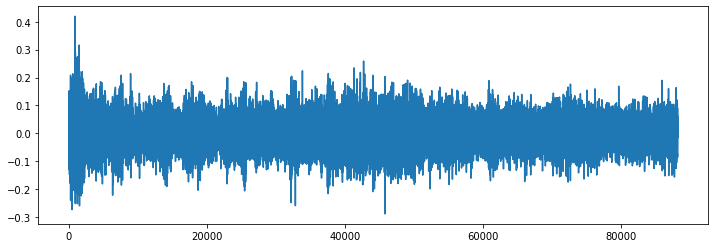

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.show()

In [ ]:
from IPython.display import Audio
Audio('/content/drive/MyDrive/02-Urban8k-grup6/audio/fold6/104327-2-0-28.wav')

In [ ]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)

In [ ]:
mfccs.shape

(40, 173)

In [ ]:
audio_dataset_path='/content/drive/MyDrive/02-Urban8k-grup6/audio'
metadata=pd.read_csv('/content/drive/MyDrive/02-Urban8k-grup6/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/content/drive/MyDrive/02-Urban8k-grup6', 'fold'+str(row['fold']), row['slice_file_name']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [ ]:
def feature_extractor(csv_file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfcss_scaled_features=np.mean(mfccs_features.T,axis=0)

    return mfcss_scaled_features

In [ ]:
 extracted_features= []

for index_num,row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(audio_dataset_path),'/content/drive/MyDrive/02-Urban8k-grup6/audio', 'fold' +str(row['fold'])+'/',str(row['slice_file_name'])) 
    final_class_labels = row['class']   
    data=feature_extractor=(file_name)
    extracted_features.append([data,final_class_labels])

8732it [00:00, 13392.90it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=["features","class"])
extracted_features_df.head()

,features,class
0,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,dog_bark
1,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,children_playing
2,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,children_playing
3,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,children_playing
4,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,children_playing


In [ ]:
extracted_features_df.tail()

,features,class
8727,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,car_horn
8728,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,car_horn
8729,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,car_horn
8730,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,car_horn
8731,/content/drive/MyDrive/02-Urban8k-grup6/audio/...,car_horn


In [ ]:
x=np.array(extracted_features_df['features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
x.shape

(8732,)

In [ ]:
y.shape

(8732,)

In [ ]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
xtrain

array(['/content/drive/MyDrive/02-Urban8k-grup6/audio/fold3/62837-7-0-20.wav',
       '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold3/112075-5-0-2.wav',
       '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold3/185801-4-0-2.wav',
       ...,
       '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold7/192236-3-0-2.wav',
       '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold10/167464-0-0-6.wav',
       '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold4/159751-8-0-1.wav'],
      dtype='<U71')

In [ ]:
num_labels=10

In [ ]:
model = Sequential()

model.add(Dense(125, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(250))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(125))
model.add(Activation('relu'))
model.add(Dropout(0.5))


model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 125)               5125      
                                                                 
 activation (Activation)     (None, 125)               0         
                                                                 
 dropout (Dropout)           (None, 125)               0         
                                                                 
 dense_1 (Dense)             (None, 250)               31500     
                                                                 
 activation_1 (Activation)   (None, 250)               0         
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_2 (Dense)             (None, 125)               3

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
num_epochs = 100
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history_relu = model_relu.fit(x_train,y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data = (x_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
num_epochs = 150
num_batch_size = 32

model.fit(
          x_train, 
          y_train, 
          batch_size=num_batch_size, 
          epochs=num_epochs,
          validation_data=(x_test, y_test),
         )

In [ ]:
def extract_feature(file_name):
    audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    fea = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=50)
    scaled = np.mean(fea.T,axis=0)
    return np.array([scaled])

In [ ]:
def print_prediction(file_name):
    pred_fea = extract_feature(file_name) 
    pred_vector = np.argmax(model.predict(pred_fea), axis=-1)
    pred_class = le.inverse_transform(pred_vector)
    print("The predicted class is:", pred_class[0], '\n') 
    

In [ ]:
file_name = '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold4/107653-9-0-3.wav'

print_prediction (file_name)

ipd.Audio(file_name)


In [ ]:
#@title
file_name = '/content/drive/MyDrive/02-Urban8k-grup6/audio/fold4/107653-9-0-5.wav'

print_prediction(file_name)

ipd.Audio(file_name)